In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Runtime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detecte

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [4]:
df_purchase_day = pd.read_csv("관광_당일여행_여행지_구매_항목별_지출_비중.csv")
df_purchase_lodgment = pd.read_csv("관광_숙박여행_여행지_구매_항목별_지출_비중.csv")

In [29]:
df_purchase_day

,시점,항목,통계분류(1),통계분류(2),데이터
0,2018,음식점비,성별,남자,47.0
1,2018,음식점비,성별,여자,45.7
2,2018,음식점비,연령,15~19세,41.9
3,2018,음식점비,연령,20대,48.4
4,2018,음식점비,연령,30대,47.9
...,...,...,...,...,...
326,2022,기타비,연령,30대,0.1
327,2022,기타비,연령,40대,0.1
328,2022,기타비,연령,50대,0.1
329,2022,기타비,연령,60대,0.2


In [16]:
item_cate = df_purchase_day.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),15~19세,20대,30대,40대,50대,60대,70세 이상
항목,,,,,,,
교통비,21.9,24.9,27.8,25.9,27.80,28.80,27.8
기타비,0.2,0.2,0.1,0.2,0.30,0.30,0.8
쇼핑비,15.0,11.7,10.6,12.2,11.80,12.10,10.4
식음료비,8.9,8.1,8.7,8.8,8.55,9.35,9.5
여행 활동비,12.1,7.7,7.3,6.6,5.80,4.30,4.6
여행 회비/모임 회비,1.6,1.1,0.4,1.5,1.20,1.90,2.4
여행사 상품 구입 및 가이드 경비,0.9,0.3,0.2,0.4,0.40,1.00,1.3
음식점비,43.9,48.7,47.9,48.4,47.40,47.40,47.5


Text(0.5, 1.0, '연령별 관광_당일여행_여행지_구매_항목별_지출_비중')

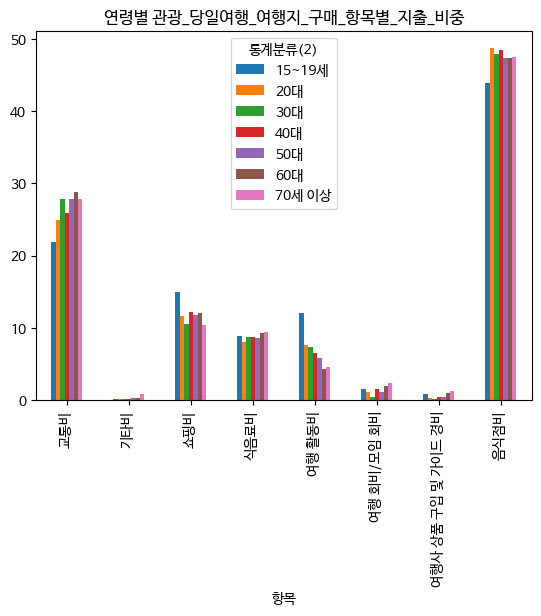

In [17]:
result.plot(kind='bar')
plt.title("연령별 관광_당일여행_여행지_구매_항목별_지출_비중")

In [18]:
item_cate = df_purchase_day.query("`통계분류(1)` == '성별'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result

통계분류(2),남자,여자
항목,,
교통비,27.8,25.50
기타비,0.2,0.30
쇼핑비,10.2,12.60
식음료비,8.8,8.55
여행 활동비,7.3,6.40
여행 회비/모임 회비,0.9,1.20
여행사 상품 구입 및 가이드 경비,0.3,0.40
음식점비,48.4,47.70


Text(0.5, 1.0, '성별별 관광_당일여행_여행지_구매_항목별_지출_비중')

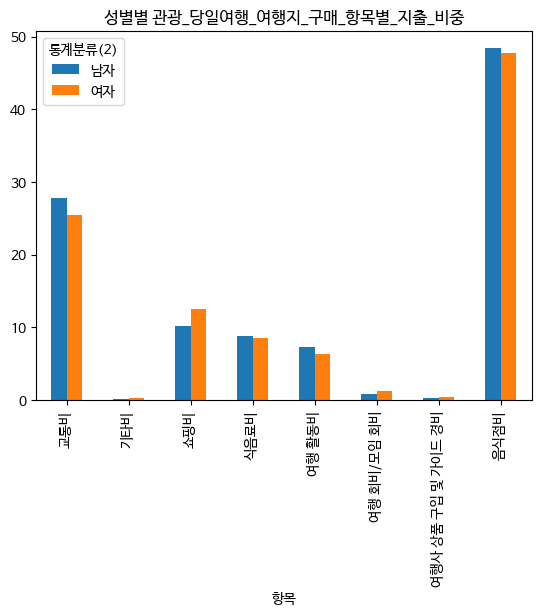

In [19]:
result.plot(kind='bar')
plt.title("성별별 관광_당일여행_여행지_구매_항목별_지출_비중")

In [24]:
df_purchase_day['시점'] = df_purchase_day['시점'].astype(str)
grouped = df_purchase_day.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result

항목,교통비,기타비,쇼핑비,식음료비,여행 활동비,여행 회비/모임 회비,여행사 상품 구입 및 가이드 경비,음식점비
시점,,,,,,,,
2018,259.9,1.9,103.3,NaN,70.1,45.0,6.5,413.3
2019,257.1,5.0,113.0,NaN,63.7,33.5,12.6,415.4
2020,236.5,4.4,154.7,NaN,62.1,10.1,2.0,430.5
2021,228.5,2.8,101.9,77.6,51.0,4.4,1.7,432.2
2022,232.3,1.1,66.7,80.9,73.0,9.8,5.2,430.7


Text(0.5, 1.0, '연도별 관광_당일여행_여행지_구매_항목별_지출_비중')

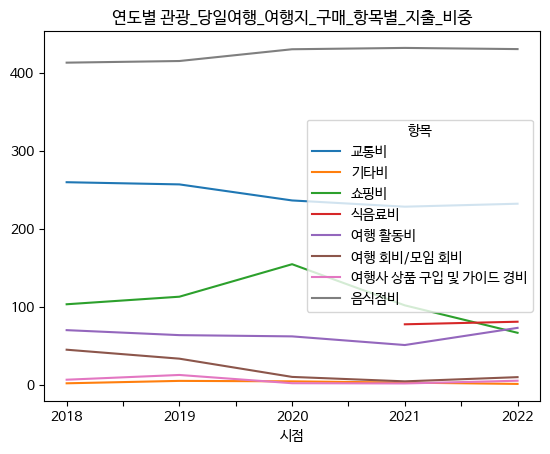

In [25]:
result.plot(kind='line')
plt.title("연도별 관광_당일여행_여행지_구매_항목별_지출_비중")

In [27]:
df_purchase_lodgment

,시점,항목,통계분류(1),통계분류(2),데이터
0,2018,음식점비,성별,남자,33.5
1,2018,음식점비,성별,여자,33.0
2,2018,음식점비,연령,15~19세,31.4
3,2018,음식점비,연령,20대,33.4
4,2018,음식점비,연령,30대,33.7
...,...,...,...,...,...
370,2022,기타비,연령,30대,0.0
371,2022,기타비,연령,40대,0.0
372,2022,기타비,연령,50대,0.0
373,2022,기타비,연령,60대,0.1


Text(0.5, 1.0, '연령별 관광_숙박여행_여행지_구매_항목별_지출_비중')

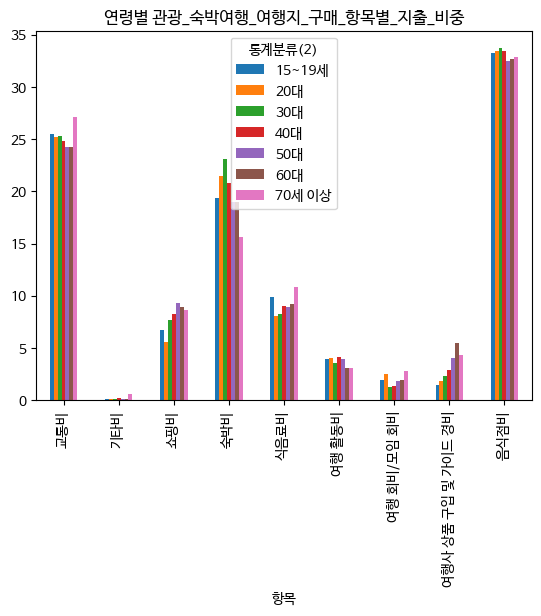

In [31]:
item_cate = df_purchase_lodgment.query("`통계분류(1)` == '연령'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result.plot(kind='bar')
plt.title("연령별 관광_숙박여행_여행지_구매_항목별_지출_비중")

Text(0.5, 1.0, '성별별 관광_숙박여행_여행지_구매_항목별_지출_비중')

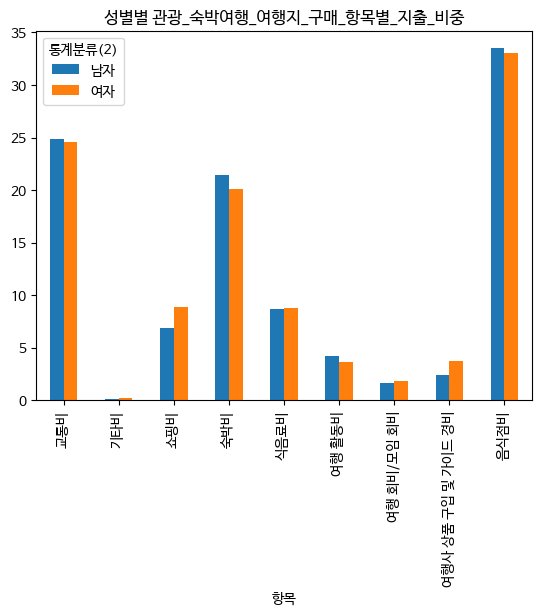

In [33]:
item_cate = df_purchase_lodgment.query("`통계분류(1)` == '성별'")
grouped = item_cate.groupby(['항목', '통계분류(2)'])
result = grouped['데이터'].median().unstack()
result.plot(kind='bar')
plt.title("성별별 관광_숙박여행_여행지_구매_항목별_지출_비중")

Text(0.5, 1.0, '연도별 관광_숙박여행_여행지_구매_항목별_지출_비중')

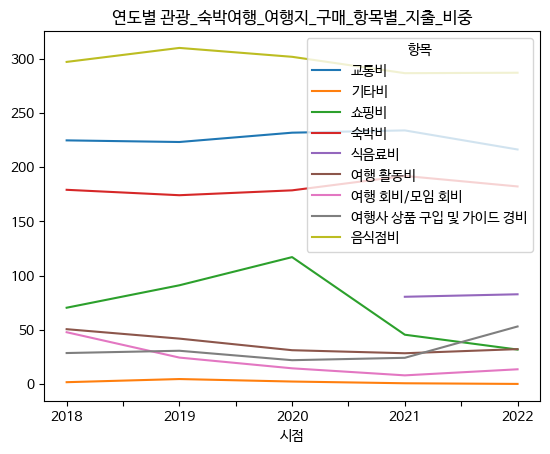

In [34]:
df_purchase_lodgment['시점'] = df_purchase_lodgment['시점'].astype(str)
grouped = df_purchase_lodgment.groupby(['시점', '항목'])
result = grouped['데이터'].sum().unstack()
result.plot(kind='line')
plt.title("연도별 관광_숙박여행_여행지_구매_항목별_지출_비중")